In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set_theme(style="darkgrid")

In [175]:
dir = r"/home/bruno/Documentos/mba_usp/arvores_redes_ensemble_models_2/Arquivos e scripts 27.06.23 - Atualizado/tips.csv"
df = pd.read_csv(dir).drop(columns="Unnamed: 0")

df_copy = df.copy()

df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [176]:
df_copy["pct_tip"] = df_copy.tip / (df_copy.total_bill - df_copy.tip)
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


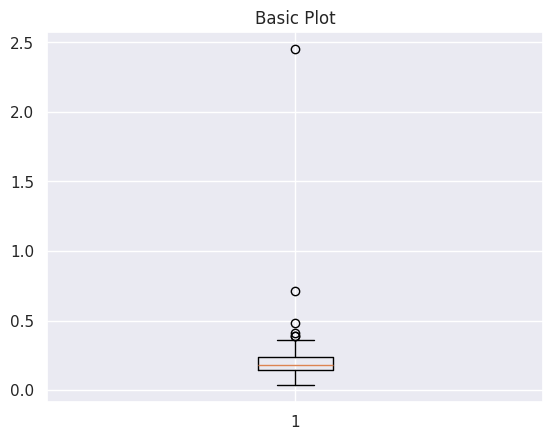

In [177]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

Remoção de outliers

Utilizando apenas valores de pct_tip menores que 1

In [178]:
df_copy = df_copy[df_copy["pct_tip"] < 1]

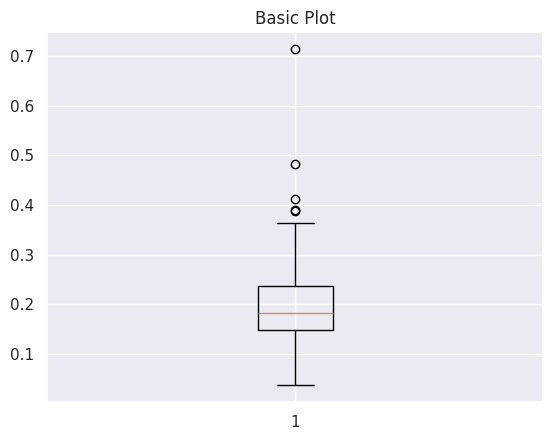

In [179]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df_copy.pct_tip);

In [180]:
def count_plot(df, eixo_x):
    return sns.countplot(df, x=eixo_x)

def bar_plot(df, eixo_x, eixo_y):
    # Criar um gráfico de barras com intervalo de confiança
    ax = sns.barplot(data=df, x=eixo_x, y=eixo_y,  errorbar="sd")
        
    return sns.pointplot(data=df, x=eixo_x, y=eixo_y, color="black", errorbar=None, estimator=lambda x: x.mean(), ax=ax)

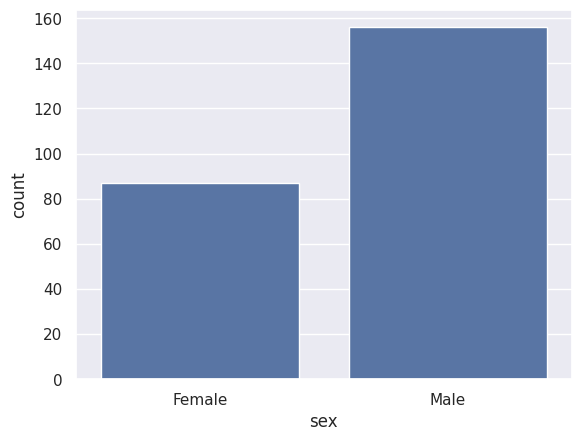

In [181]:
count_plot(df_copy, "sex");

De acordo com o plot acima, a população masculina é maior que a feminina

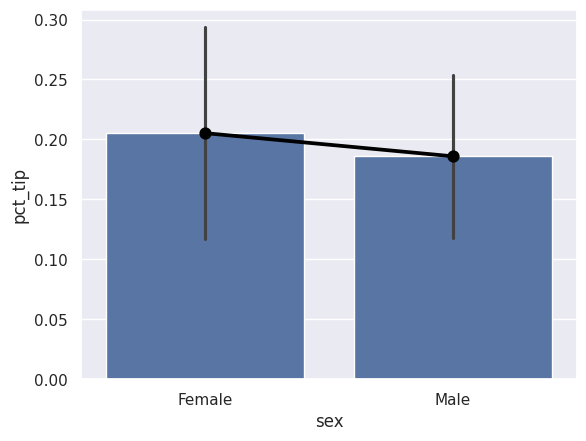

In [182]:
bar_plot(df_copy, "sex", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a população feminina é um pouco maior que a masculina.

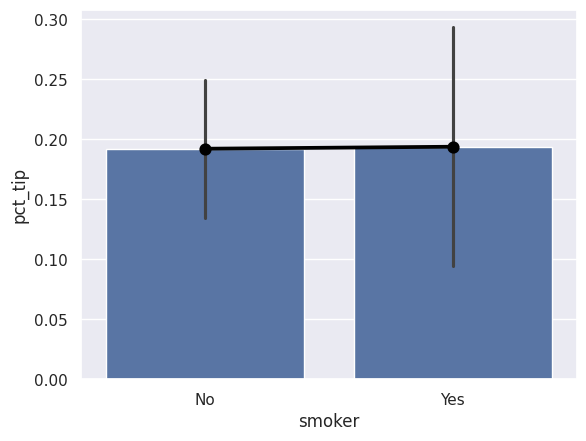

In [183]:
bar_plot(df_copy, "smoker", "pct_tip");

No gŕafico acima a porcentagem de gorjeta entre a fumantes e não fumantes é relativamente igual.

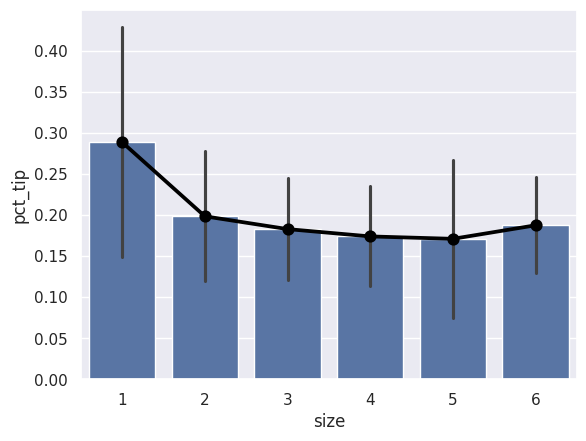

In [184]:
bar_plot(df_copy, "size", "pct_tip");

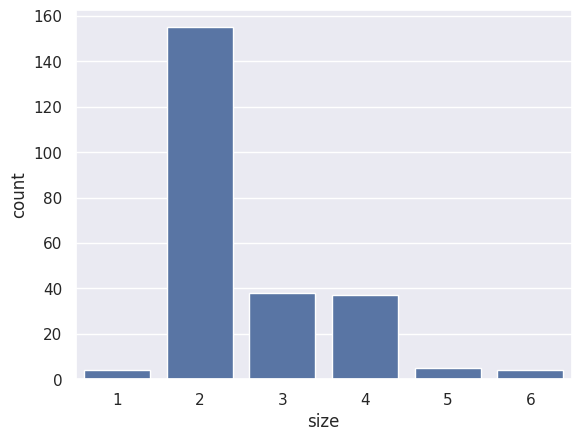

In [185]:
count_plot(df_copy, "size");

No gráfico 5 podemos verificar que a mesa que possui lugar para 1 pessoa (size = 1) tem a maior porcentagem de dar gorjeta, porém, realizando o plot com base na frequencia das mesas (grafico 6), a quantidade de mesas com lugar para 1 pessoa é extremamente baixo.

In [186]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Método LabelEncoding: Converter variaveis categoricas para numéricas

In [196]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df, col):
    # Creating a instance of label Encoder.
    le = LabelEncoder()

    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(df[col])

    return label

In [197]:
label_sex = label_encoding(df_copy, "sex")
label_smoker = label_encoding(df_copy, "smoker")
label_day = label_encoding(df_copy, "day")
label_time = label_encoding(df_copy, "time")

In [198]:
df_copy["label_sex"] = label_sex
df_copy["label_smoker"] = label_smoker
df_copy["label_day"] = label_day
df_copy["label_time"] = label_time

In [199]:
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip,label_sex,label_smoker,label_day,label_time
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,0,0,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,1,0,2,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,1,0,2,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,1,0,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,0,0,2,0


Treinamento da árvore (não incluso o valor da gorjeta como explicativa)

In [200]:
# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

x = df_copy.drop(['sex', 'smoker', 'day', 'time', 'pct_tip', 'total_bill', 'tip'], axis = 1) # Features
y = df_copy['pct_tip']  # Target

Split para  set de treino e teste

In [201]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

Fit do modelo

In [202]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [203]:
# Predicting the target values of the test set
y_pred = model.predict(x_test)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  0.098


In [204]:
x['size'].unique()

array([2, 3, 4, 1, 6, 5])

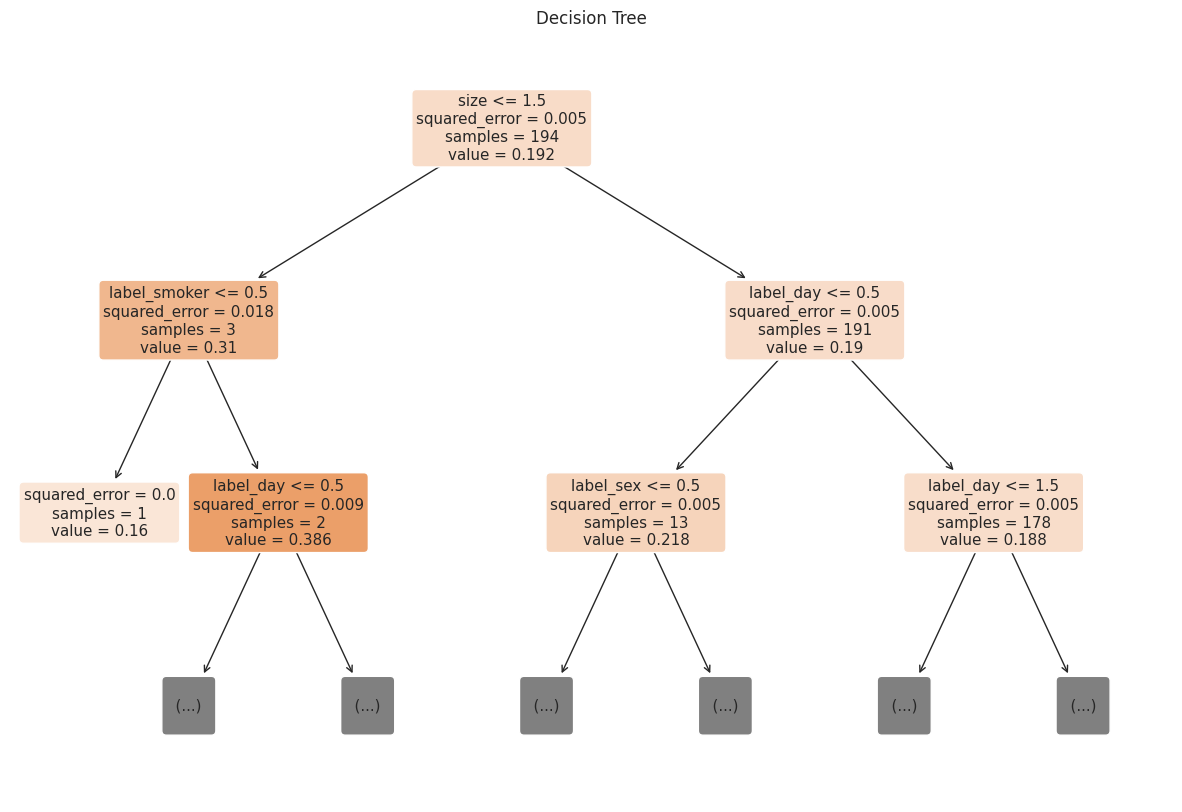

In [173]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model,
          filled=True,
          feature_names=x.columns,
          max_depth=2,
          rounded=True)

plt.title("Decision Tree")  
plt.show()